# **Nama         : Johar Bayu Kurniawan**
# **Kode Peserta : PYTN-KS14-015**

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Data Preprocessing

In [41]:
# Load the dataset
df = pd.read_csv("/content/dataset/nyc-rolling-sales.csv")

# Print the first 5 rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

df.dtypes

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Dengan melihat dtypes dan head, diketahui bahwa banyak data 0 atau - pada sale price yang menunjukan properti hibah dari orang tua kepada anaknya atau bisa juga data yang tidak akurat, maka dari itu kita perlu merubahtipe data SALE PRICE menjadi int64 serta menghapus baris data yang mempunyai nilai 0 pada SALE PRICE

In [42]:
cols_to_convert = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
cols_to_convert2 = ['SALE DATE']

# Convert the object columns to int64 datatype
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')

for col in cols_to_convert2:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df = df[df["SALE PRICE"] != 0]

# Print the data types of all columns in the dataframe
print(df.dtypes)
df.head

Unnamed: 0                                 int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

<bound method NDFrame.head of        Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
6              10        1  ALPHABET CITY   
9              13        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS               

kolom SALE DATE juga perlu diubah menjadi datetime karena nanti akan digunakan untuk filtering berdasarkan tanggal

In [43]:
df_int = df.select_dtypes(include=['int64'])

In [44]:
df_int.head

<bound method NDFrame.head of        Unnamed: 0  BOROUGH  BLOCK  LOT  ZIP CODE  RESIDENTIAL UNITS  \
0               4        1    392    6     10009                  5   
3               7        1    402   21     10009                 10   
4               8        1    404   55     10009                  6   
6              10        1    406   32     10009                  8   
9              13        1    387  153     10009                 24   
...           ...      ...    ...  ...       ...                ...   
84543        8409        5   7349   34     10309                  2   
84544        8410        5   7349   78     10309                  2   
84545        8411        5   7351   60     10309                  2   
84546        8412        5   7100   28     10309                  0   
84547        8413        5   7105  679     10309                  0   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                     0            5    

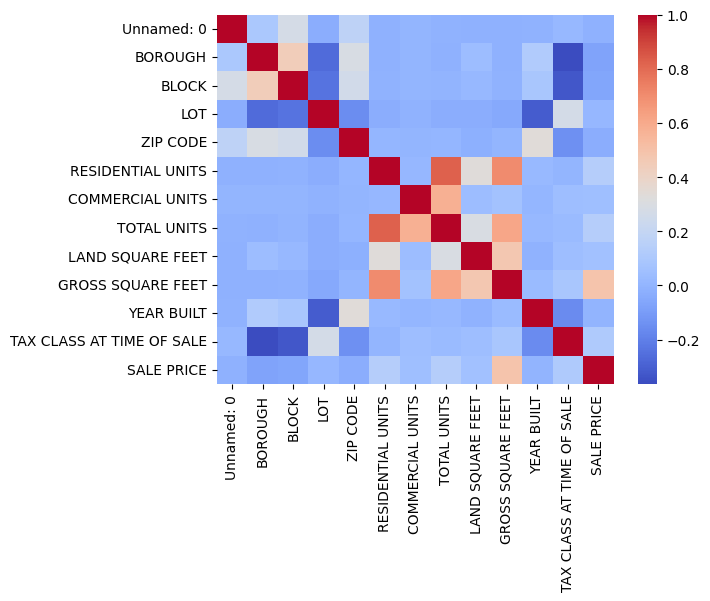

In [45]:
# Calculate the correlation matrix
corr = df_int.corr()

# Generate a heatmap using Seaborn
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

# Show the plot
plt.show()

dari heatmap dapat diketahui bahwa TOTAL UNITS berkorelas kuat dengan RESIDENTIAL UNITS yang menunjukan bahwa pada dataset residential unit menyumbang jumlah paling besar pada total unit, lalu diikuti korelasi kuat oleh gross square feet dengan residential unit, serta total unit dan gross square unit

# Mean Median Modus Range Mode Variance and Standard Deviation


In [33]:
# Calculate mean, median, mode, range, variance, and standard deviation for each column
for column in df_int:
    mean = df_int[column].mean()
    median = df_int[column].median()
    mode = df_int[column].mode()[0]
    min_val = df_int[column].min()
    max_val = df_int[column].max()
    range_val = max_val - min_val
    variance = df_int[column].var()
    std_dev = df_int[column].std()
    
    # Print results
    print(f"Column: {column}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print("-------------------------------")

Column: Unnamed: 0
Mean: 10300.06
Median: 9032.00
Mode: 7.00
Range: 26734.00
Variance: 50241340.25
Standard Deviation: 7088.11
-------------------------------
Column: BOROUGH
Mean: 2.94
Median: 3.00
Mode: 4.00
Range: 4.00
Variance: 1.76
Standard Deviation: 1.33
-------------------------------
Column: BLOCK
Mean: 4151.62
Median: 3167.00
Mode: 5066.00
Range: 16318.00
Variance: 12737356.86
Standard Deviation: 3568.94
-------------------------------
Column: LOT
Mean: 390.77
Median: 50.00
Mode: 1.00
Range: 9105.00
Variance: 450032.04
Standard Deviation: 670.84
-------------------------------
Column: ZIP CODE
Mean: 10705.74
Median: 11207.00
Mode: 10314.00
Range: 11694.00
Variance: 1597944.19
Standard Deviation: 1264.10
-------------------------------
Column: RESIDENTIAL UNITS
Mean: 1.73
Median: 1.00
Mode: 1.00
Range: 1844.00
Variance: 200.49
Standard Deviation: 14.16
-------------------------------
Column: COMMERCIAL UNITS
Mean: 0.16
Median: 0.00
Mode: 0.00
Range: 2261.00
Variance: 96.46
Sta

# Probability Distribution

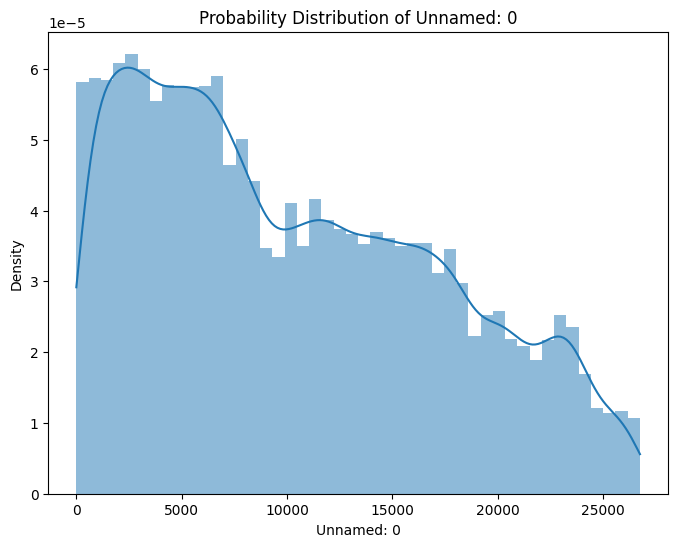

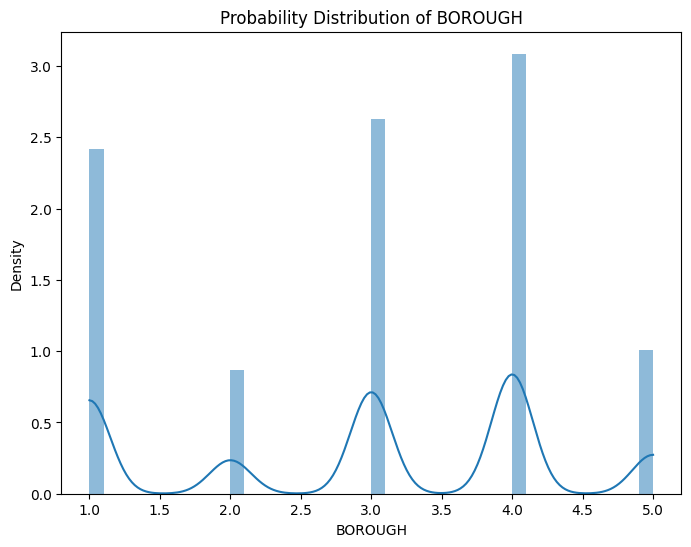

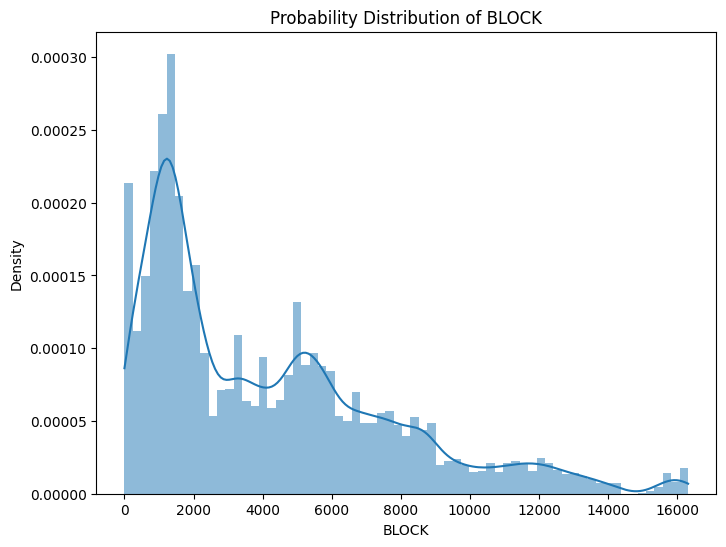

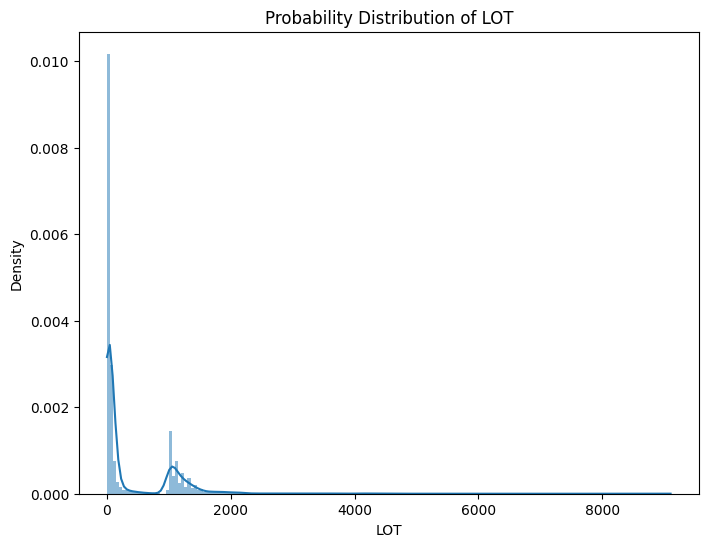

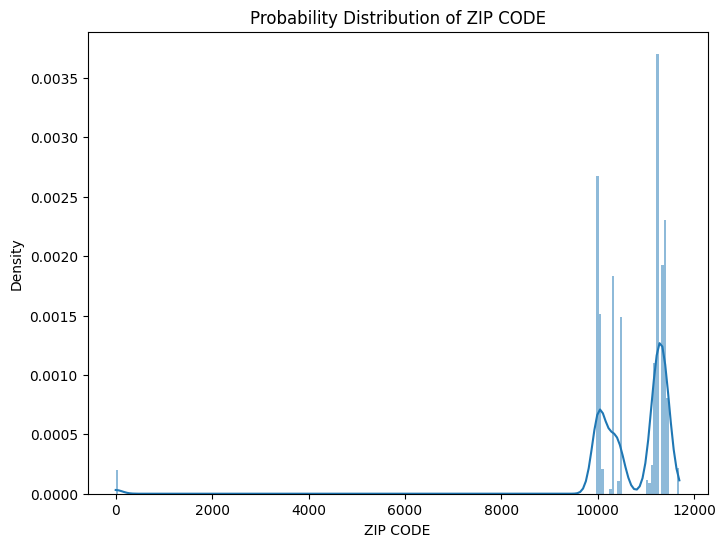

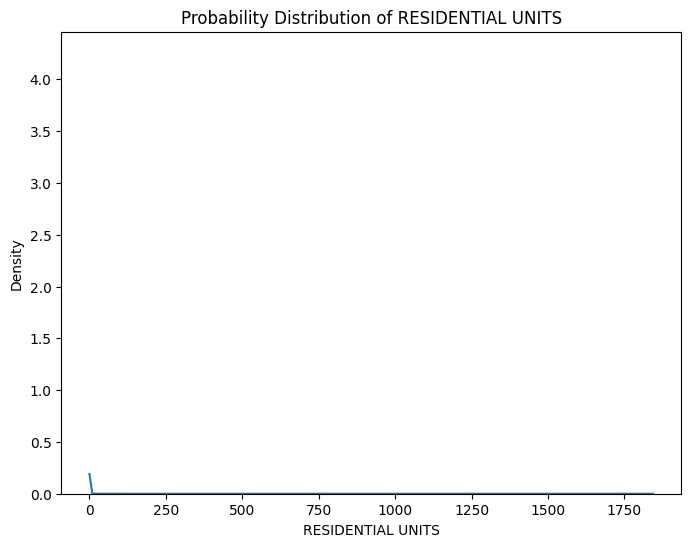

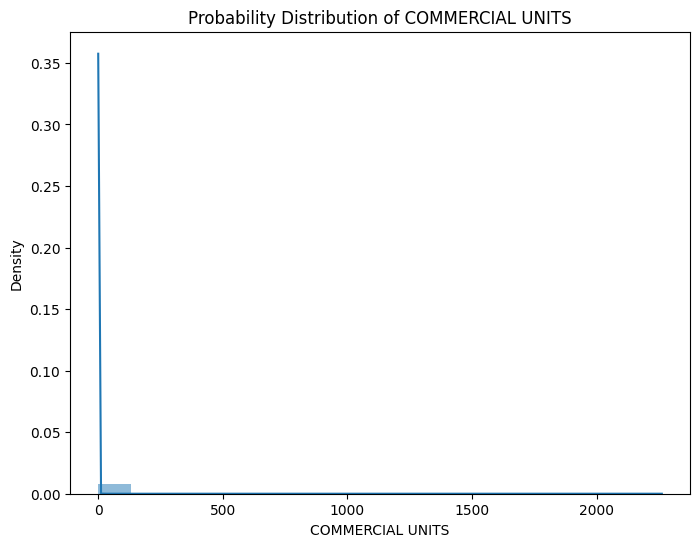

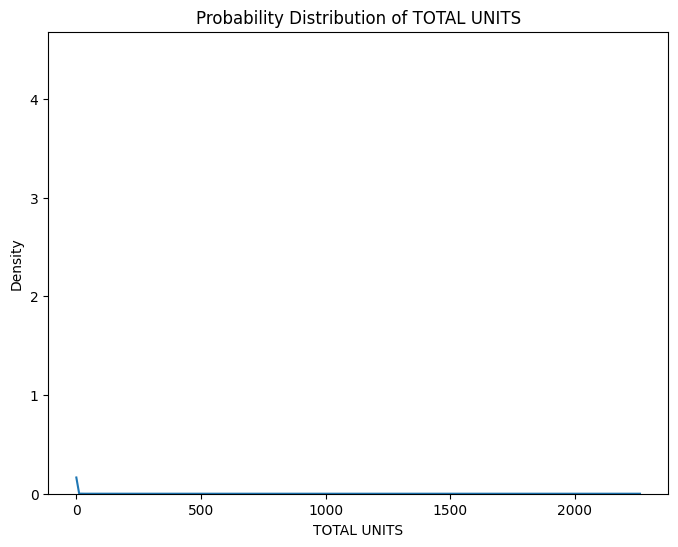

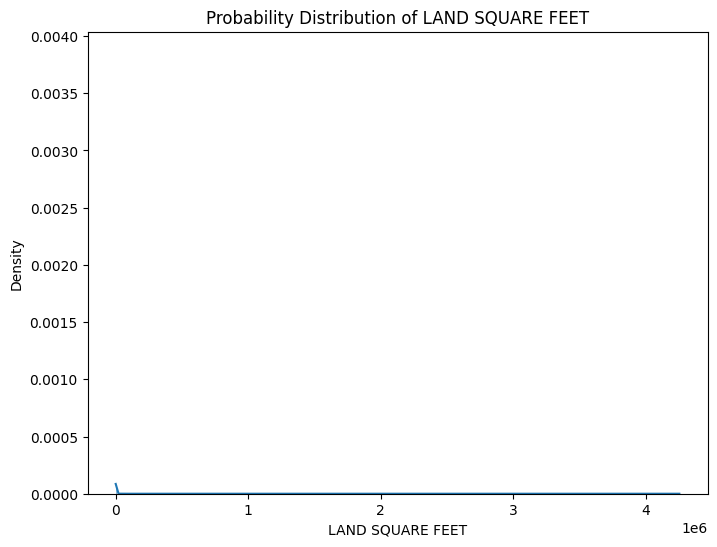

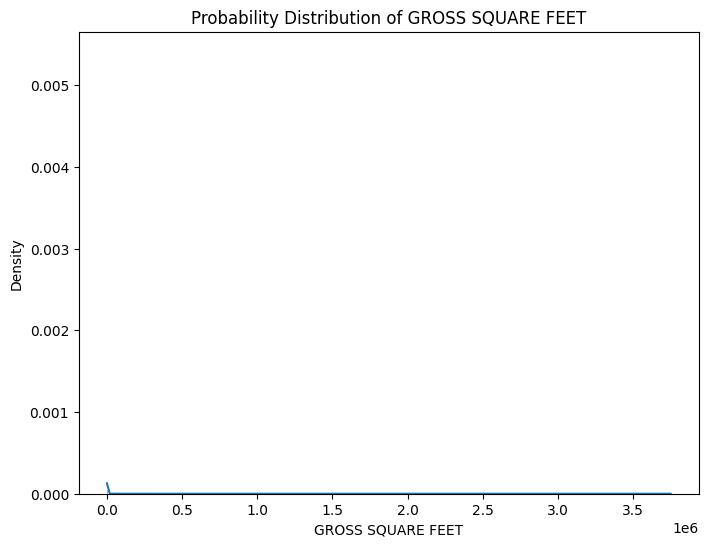

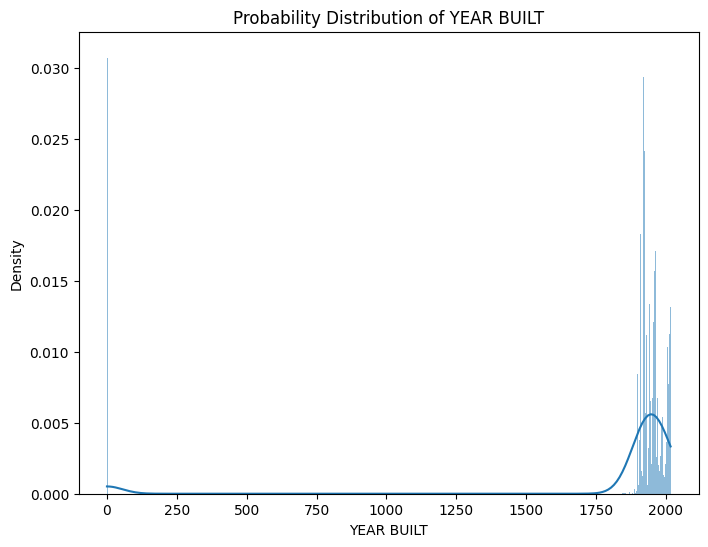

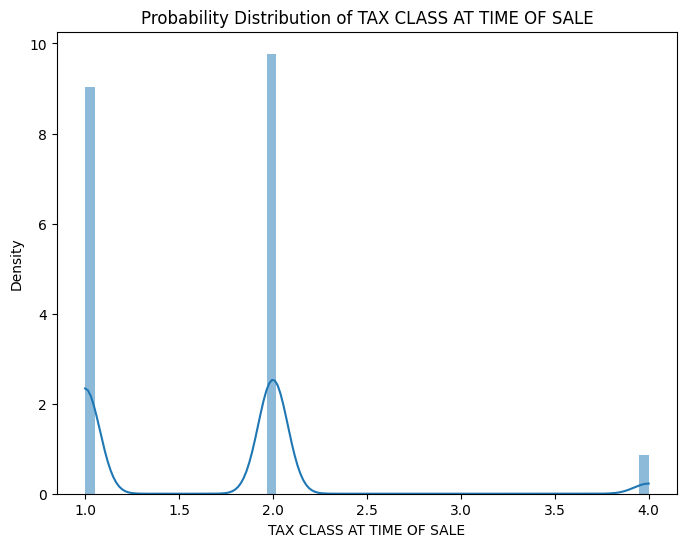

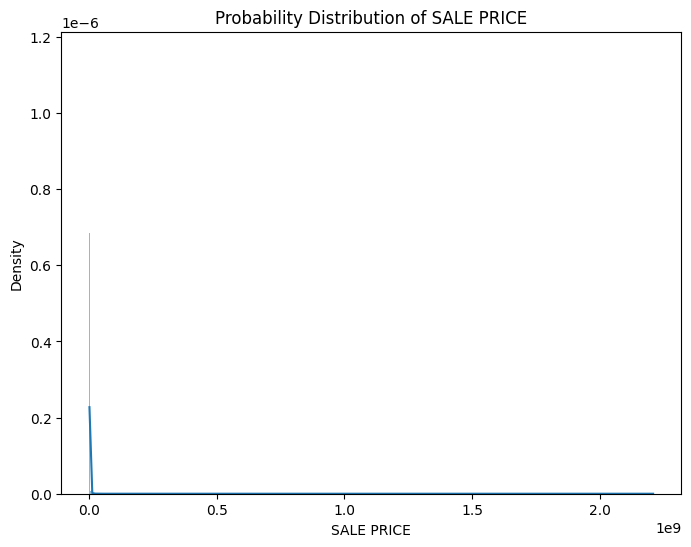

In [34]:
# Loop through the columns and create a histogram
for col in df_int:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_int, x=col, kde=True, stat="density", linewidth=0)
    plt.title("Probability Distribution of {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

BLOCK berdistribusi gamma, sedangkan SALE PRICE dan LOT berdistribusi eksponensial

# Confidence Intervals

In [36]:
# Calculate the mean and standard deviation of the sale price column
sale_price_mean = np.mean(df_int["SALE PRICE"])
sale_price_std = np.std(df_int["SALE PRICE"])

# Determine the sample size and level of confidence
n = len(df_int)
confidence_level = 0.95

# Calculate the t-score for a 95% confidence interval
t_score = t.ppf((1 + confidence_level) / 2, n - 1)

# Calculate the confidence interval
confidence_interval = sale_price_mean + (t_score * (sale_price_std / np.sqrt(n)))

print("The 95% confidence interval for the sale price is:", confidence_interval)

The 95% confidence interval for the sale price is: 1593782.1909989247


# Hypothesis Testing

## Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?

In [38]:
nyc_sales_data = df

# Filter the data for properties built between 1900 and 2000 vs. 2001
sales_between_1900_2000 = nyc_sales_data[(nyc_sales_data['YEAR BUILT'] >= 1900) & (nyc_sales_data['YEAR BUILT'] <= 2000)]
sales_in_2001 = nyc_sales_data[nyc_sales_data['YEAR BUILT'] == 2001]

# Calculate the average units sold for each group
avg_units_1900_2000 = sales_between_1900_2000['TOTAL UNITS'].mean()
avg_units_2001 = sales_in_2001['TOTAL UNITS'].mean()

# Print the results
print(f"Average units sold for properties built between 1900 and 2000: {avg_units_1900_2000:.2f}")
print(f"Average units sold for properties built in 2001: {avg_units_2001:.2f}")

Average units sold for properties built between 1900 and 2000: 2.08
Average units sold for properties built in 2001: 1.61


## Is there a difference in unit sold based on building category?

In [39]:
# Group the data by building category and calculate the average units sold for each category
sales_by_building_category = nyc_sales_data.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].mean()

# Print the results
print(sales_by_building_category)


BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                           1.019144
02 TWO FAMILY DWELLINGS                           2.043718
03 THREE FAMILY DWELLINGS                         2.999586
04 TAX CLASS 1 CONDOS                             0.980392
05 TAX CLASS 1 VACANT LAND                        0.135135
06 TAX CLASS 1 - OTHER                            0.300000
07 RENTALS - WALKUP APARTMENTS                   11.456208
08 RENTALS - ELEVATOR APARTMENTS                 88.291866
09 COOPS - WALKUP APARTMENTS                      0.220939
10 COOPS - ELEVATOR APARTMENTS                    0.608873
11 SPECIAL CONDO BILLING LOTS                     0.000000
11A CONDO-RENTALS                                31.578947
12 CONDOS - WALKUP APARTMENTS                     1.000000
13 CONDOS - ELEVATOR APARTMENTS                   0.953223
14 RENTALS - 4-10 UNIT                            5.299703
15 CONDOS - 2-10 UNIT RESIDENTIAL                 0.947217
16 CONDOS - 2-10 UNIT WITH COMME

## What can you discover about New York City real estate by looking at a year's worth

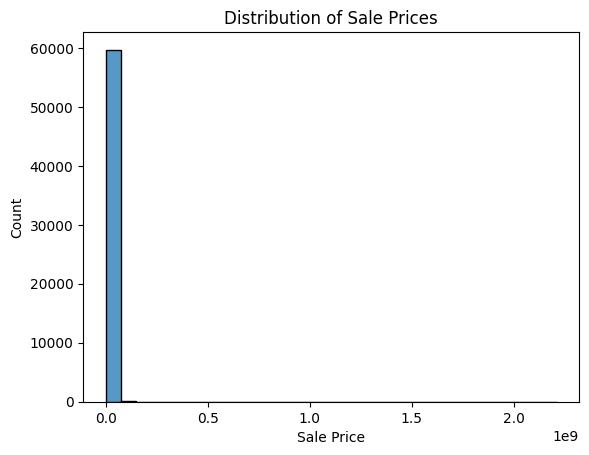

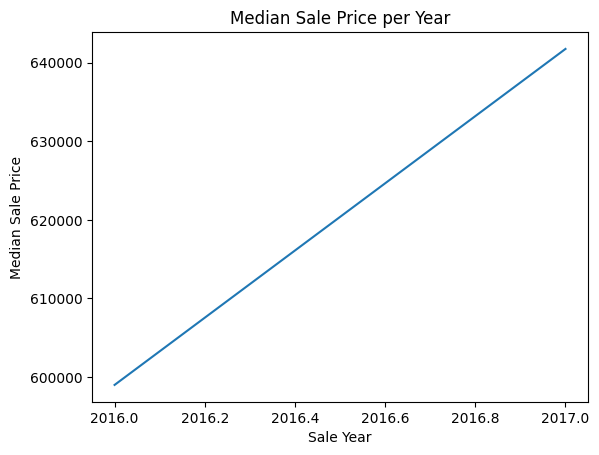

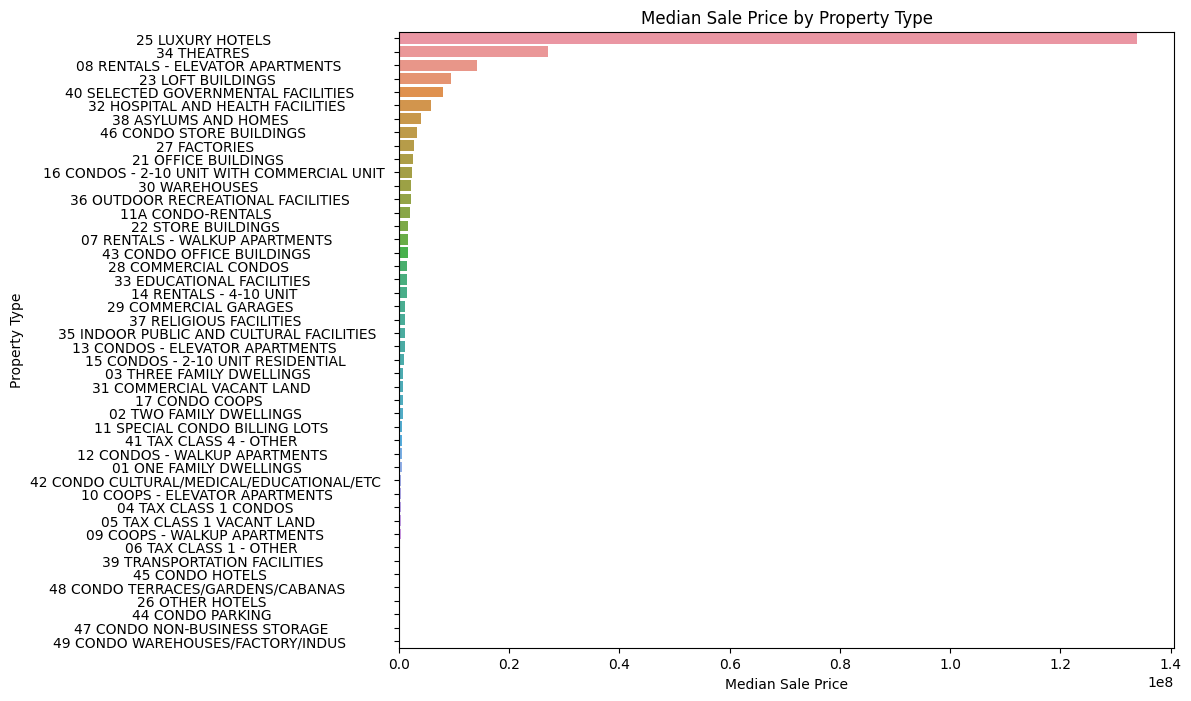

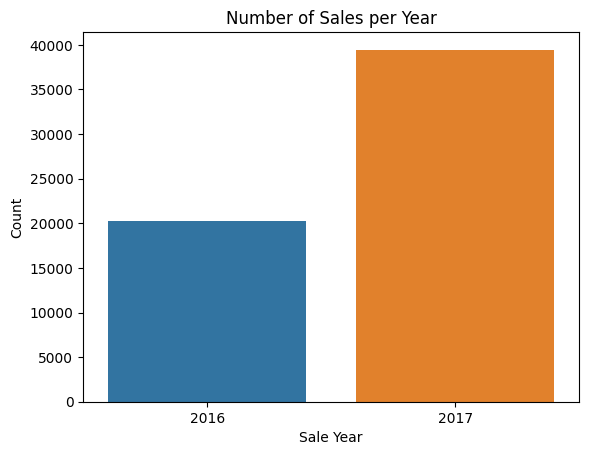

In [40]:
# Look at a year's worth of data (January to December of 2019)
sales_in_2019 = nyc_sales_data[(nyc_sales_data['SALE DATE'] >= '2019-01-01') & (nyc_sales_data['SALE DATE'] <= '2019-12-31')]

# Calculate the total sales and average price per square foot for each month
sales_by_month = sales_in_2019.groupby(pd.Grouper(key='SALE DATE', freq='M')).agg({'SALE PRICE': 'sum', 'GROSS SQUARE FEET': 'sum'})
sales_by_month['AVG PRICE PER SQFT'] = sales_by_month['SALE PRICE'] / sales_by_month['GROSS SQUARE FEET']

# Extract the year from SALE DATE column
nyc_sales_data['SALE DATE'] = pd.to_datetime(nyc_sales_data['SALE DATE'])
nyc_sales_data['SALE YEAR'] = nyc_sales_data['SALE DATE'].dt.year

# Plot the distribution of prices
sns.histplot(nyc_sales_data['SALE PRICE'], bins=30)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Prices')
plt.show()

# Plot the trends in the market
nyc_sales_data.set_index('SALE DATE', inplace=True)
df_median_price = nyc_sales_data.groupby('SALE YEAR')['SALE PRICE'].median().reset_index()
sns.lineplot(x='SALE YEAR', y='SALE PRICE', data=df_median_price)
plt.xlabel('Sale Year')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price per Year')
plt.show()

df_median_price_type = nyc_sales_data.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].median().reset_index()
df_median_price_type = df_median_price_type.sort_values(by='SALE PRICE', ascending=False).reset_index(drop=True)

# Set the figure size to be wider
plt.figure(figsize=(10, 8))

sns.barplot(x='SALE PRICE', y='BUILDING CLASS CATEGORY', data=df_median_price_type)
plt.xlabel('Median Sale Price')
plt.ylabel('Property Type')
plt.title('Median Sale Price by Property Type')
plt.show()

sns.countplot(x=nyc_sales_data['SALE YEAR'])
plt.xlabel('Sale Year')
plt.ylabel('Count')
plt.title('Number of Sales per Year')
plt.show()

Dapat disimpulkan bahwa:
1.   Setiap tahun harga properti semakin meningkat dari 2016 sampai 2017
2.   Harga median tertinggi untuk properti adalah yang bertipe Luxury hotels, ini berbanding lurus dengan luas bangunannya
3.   Walaupun harga terus naik, dari tahun 2016 ke 2017 properti yang berhasil terjual juga tetap naik tidak mengurangi minat pasar untuk bertransaksi

